In [1]:
import pandas as pd
df = pd.read_csv("Comparison.csv")


In [2]:
import pandas_profiling

df.profile_report(style={'full_width':True})

In [30]:
df = df.drop_duplicates()
df.head(10)
df.shape

(142876, 23)

In [61]:
df1 = df.Avg_AMS
df2 = df.Avg_AMS_DQ
df3 = df.DONOR_ID
df4 = df.Avg_EMS
df5 = df.Avg_EMS_DQ
df6 = df.Avg_HMS
df7 = df.Avg_HMS_DQ

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


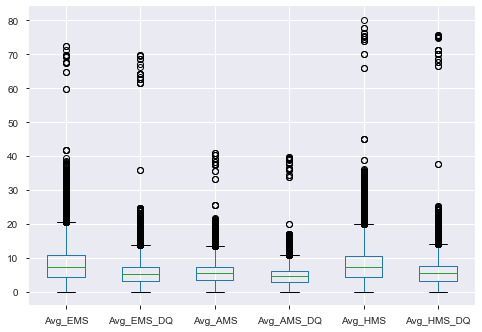

In [62]:
df.boxplot(["Avg_EMS", "Avg_EMS_DQ", "Avg_AMS", "Avg_AMS_DQ", "Avg_HMS", "Avg_HMS_DQ"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15169d080>]],
      dtype=object)

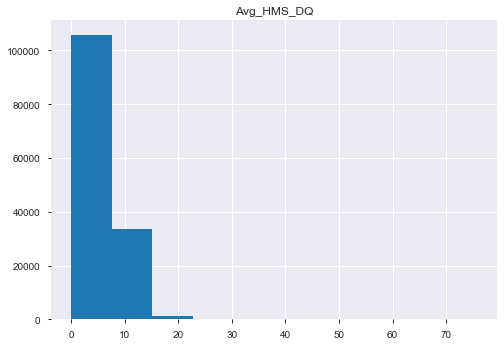

In [63]:
df.hist("Avg_HMS_DQ")

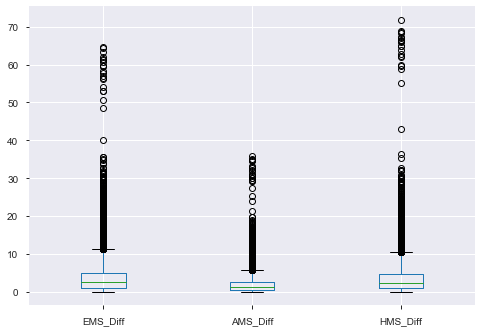

In [64]:
df['EMS_Diff'] = abs(df["Avg_EMS"] - df["Avg_EMS_DQ"])
df['AMS_Diff'] = abs(df["Avg_AMS"] - df["Avg_AMS_DQ"])
df['HMS_Diff'] = abs(df["Avg_HMS"] - df["Avg_HMS_DQ"])
df.boxplot(["EMS_Diff", "AMS_Diff", "HMS_Diff"])

In [65]:
from scipy import stats
import numpy as np

def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    
    # calculate the effect size
    return (u1 - u2) / s


print(stats.kruskal(df["Avg_EMS"], df["Avg_EMS_DQ"]))
print(stats.kruskal(df["Avg_AMS"], df["Avg_AMS_DQ"]))
print(stats.kruskal(df["Avg_HMS"], df["Avg_HMS_DQ"]))

print(stats.wilcoxon(df["Avg_EMS"], df["Avg_EMS_DQ"]))
print(stats.wilcoxon(df["Avg_AMS"], df["Avg_AMS_DQ"]))
print(stats.wilcoxon(df["Avg_HMS"], df["Avg_HMS_DQ"]))

print(stats.mannwhitneyu(df["Avg_EMS"], df["Avg_EMS_DQ"]))
print(stats.mannwhitneyu(df["Avg_AMS"], df["Avg_AMS_DQ"]))
print(stats.mannwhitneyu(df["Avg_HMS"], df["Avg_HMS_DQ"]))

print(stats.normaltest(df["Avg_EMS"]))
print(stats.normaltest(df["Avg_AMS"]))
print(stats.normaltest(df["Avg_HMS"]))

print(stats.normaltest(df["Avg_EMS_DQ"]))
print(stats.normaltest(df["Avg_AMS_DQ"]))
print(stats.normaltest(df["Avg_HMS_DQ"]))

print(stats.pearsonr(df["Avg_EMS"], df["Avg_EMS_DQ"]))
print(stats.pearsonr(df["Avg_AMS"], df["Avg_AMS_DQ"]))
print(stats.pearsonr(df["Avg_HMS"], df["Avg_HMS_DQ"]))

# Pooled Std. Dev.
stdPooled = np.power((len(df)-1)*np.std(df["Avg_EMS"]),2)
stdPooled = stdPooled + np.power((len(df)-1)*np.std(df["Avg_EMS_DQ"]),2)
stdPooled = stdPooled/(len(df)*2 -2)
stdPooled = np.sqrt(stdPooled)


print(cohend(df["Avg_EMS"], df["Avg_EMS_DQ"]))
print(cohend(df["Avg_AMS"], df["Avg_AMS_DQ"]))
print(cohend(df["Avg_HMS"], df["Avg_HMS_DQ"]))

# scipy.stats

KruskalResult(statistic=18988.259217727227, pvalue=0.0)
KruskalResult(statistic=6567.951603022484, pvalue=0.0)
KruskalResult(statistic=16222.35757414776, pvalue=0.0)
WilcoxonResult(statistic=1490725341.0, pvalue=0.0)
WilcoxonResult(statistic=2255188760.0, pvalue=0.0)
WilcoxonResult(statistic=1648726524.0, pvalue=0.0)
MannwhitneyuResult(statistic=6938993820.5, pvalue=0.0)
MannwhitneyuResult(statistic=8162997068.0, pvalue=0.0)
MannwhitneyuResult(statistic=7163958610.5, pvalue=0.0)
NormaltestResult(statistic=25552.34382151365, pvalue=0.0)
NormaltestResult(statistic=9960.435917176204, pvalue=0.0)
NormaltestResult(statistic=30391.055663097366, pvalue=0.0)
NormaltestResult(statistic=57389.74637521347, pvalue=0.0)
NormaltestResult(statistic=21849.89212356343, pvalue=0.0)
NormaltestResult(statistic=67418.77449799617, pvalue=0.0)
(0.562764787396655, 0.0)
(0.6096375805479431, 0.0)
(0.5596717432476574, 0.0)
0.5750233512850178
0.32566429241522354
0.5227546910719324


In [52]:
import pandas_profiling

df.profile_report(style={'full_width':True})

/Users/greenr/.pyenv/versions/3.7.3/lib/python3.7/site-packages/astropy/stats/bayesian_blocks.py:434: RuntimeWarning: divide by zero encountered in log
  return N_k * (np.log(N_k) - np.log(T_k))
/Users/greenr/.pyenv/versions/3.7.3/lib/python3.7/site-packages/astropy/stats/bayesian_blocks.py:434: RuntimeWarning: divide by zero encountered in log
  return N_k * (np.log(N_k) - np.log(T_k))


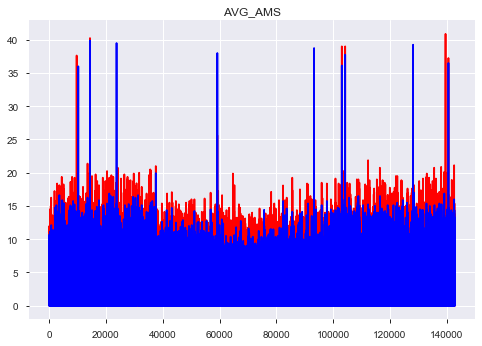

In [66]:
plt.plot( df1, 'r')
plt.plot( df2, 'b')
plt.title('AVG_AMS') 
plt.show()

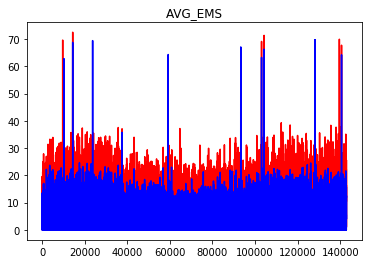

In [54]:
plt.plot( df4, 'r')
plt.plot( df5, 'b')
plt.title('AVG_EMS') 
plt.show()

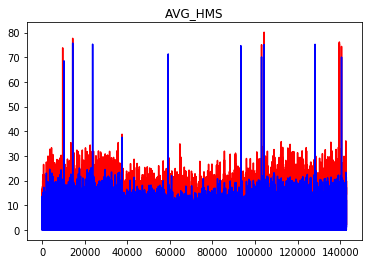

In [55]:
plt.plot( df6, 'r')
plt.plot( df7, 'b')
plt.title('AVG_HMS') 
plt.show()

In [56]:
#taking samples to see 
df8 = df.Avg_AMS.loc[:100]
df9 = df.Avg_AMS_DQ.loc[:100]
df10 = df.Avg_EMS.loc[:100]
df11 = df.Avg_EMS_DQ.loc[:100]
df12 = df.Avg_HMS.loc[:100]
df13 = df.Avg_HMS_DQ.loc[:100]



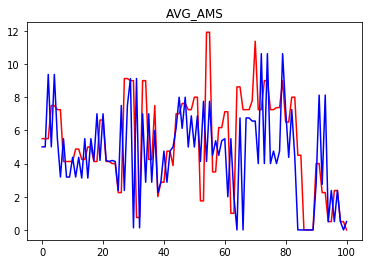

In [57]:
plt.plot( df8, 'r')
plt.plot( df9, 'b')
plt.title('AVG_AMS') 

plt.show()

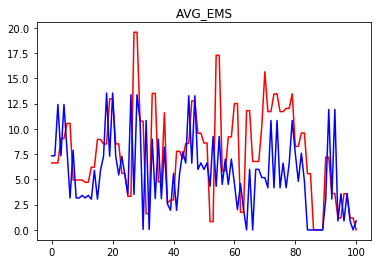

In [58]:
plt.plot( df10, 'r')
plt.plot( df11, 'b')
plt.title('AVG_EMS') 

plt.show()

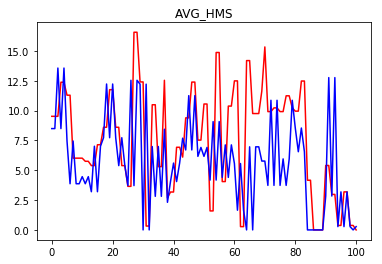

In [59]:
plt.plot( df12, 'r')
plt.plot( df13, 'b')
plt.title('AVG_HMS') 

plt.show()

In [63]:
#AMS
AMS_Diff = df["Avg_AMS_DQ"] - df["Avg_AMS"]
HMS_Diff = df["Avg_EMS_DQ"]- df["Avg_EMS"]
EMS_Diff = df["Avg_HMS_DQ"]- df["Avg_HMS"]

In [65]:
AMS_Diff.head(10)

0   -0.491071
1   -0.491071
2    3.875000
3   -2.491071
4    1.875000
5   -1.750000
6   -4.062500
7    1.375000
8   -0.937500
9   -0.937500
dtype: float64

In [66]:
HMS_Diff.head(10)

0    0.704687
1    0.704687
2    5.777857
3   -1.701920
4    3.371250
5   -2.661250
6   -7.378750
7    2.945625
8   -1.771875
9   -1.771875
dtype: float64

In [76]:
EMS_Diff.head(10)

0   -1.028125
1   -1.028125
2    4.044643
3   -3.885268
4    1.187500
5   -3.837500
6   -7.418750
7    1.437500
8   -2.143750
9   -2.143750
dtype: float64

In [77]:
#for class two EMS,AMS and HMS 

In [78]:
df14 = df.DR_AMS
df15 = df.DR_AMS_DQ
df16 = df.DR_EMS
df17 = df.DR_EMS_DQ
df18 = df.DR_HMS
df19 = df.DR_HMS_DQ

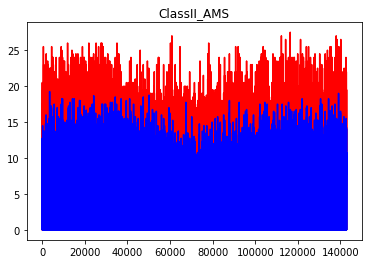

In [80]:
plt.plot( df14, 'r')
plt.plot( df15, 'b')
plt.title('ClassII_AMS') 
plt.show()

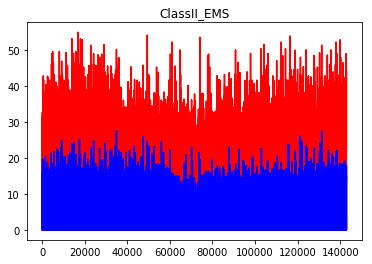

In [81]:
plt.plot( df16, 'r')
plt.plot( df17, 'b')
plt.title('ClassII_EMS') 
plt.show()

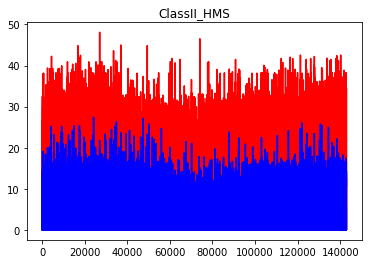

In [82]:
plt.plot( df18, 'r')
plt.plot( df19, 'b')
plt.title('ClassII_HMS') 
plt.show()

In [83]:
df20 = df.AB_AMS
df21 = df.AB_AMS_DQ
df22 = df.AB_EMS
df23 = df.AB_EMS_DQ
df24 = df.AB_HMS
df25 = df.AB_HMS_DQ

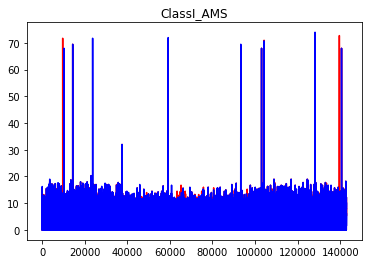

In [84]:
plt.plot( df20, 'r')
plt.plot( df21, 'b')
plt.title('ClassI_AMS') 
plt.show()

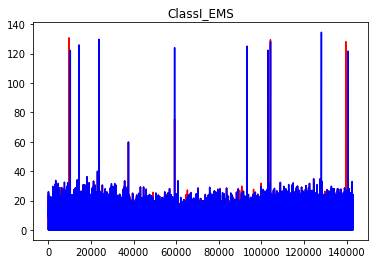

In [85]:
plt.plot( df22, 'r')
plt.plot( df23, 'b')
plt.title('ClassI_EMS') 
plt.show()

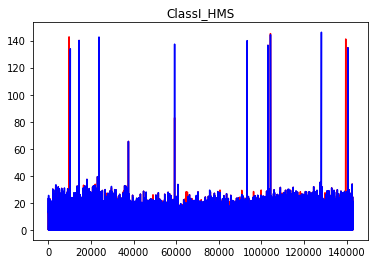

In [86]:
plt.plot( df24, 'r')
plt.plot( df25, 'b')
plt.title('ClassI_HMS') 
plt.show()